In [244]:
import xml.etree.ElementTree as ET

import numpy as np
import pandas as pd
import os

from read_xml import *
import matplotlib.pyplot as plt


# Data exploration on dataset
### 1.  android.stackexchange.com
### 2.  aviation.stackexchange.com
### 3.  health.stackexchange.com

In [245]:
df_dict_android = read_xml_files('android.stackexchange.com')
df_dict_aviation = read_xml_files('aviation.stackexchange.com')
df_dict_health = read_xml_files('health.stackexchange.com')

In [246]:
print('Dataframes in Android dataset: ' + str(df_dict_android.keys()))
print('Dataframes in Android dataset: ' + str(df_dict_aviation.keys()))
print('Dataframes in Android dataset: ' + str(df_dict_health.keys()))



Dataframes in Android dataset: dict_keys(['android_Badges', 'android_Comments', 'android_PostHistory', 'android_PostLinks', 'android_Posts', 'android_Tags', 'android_Users', 'android_Votes'])
Dataframes in Android dataset: dict_keys(['aviation_Badges', 'aviation_Comments', 'aviation_PostHistory', 'aviation_PostLinks', 'aviation_Posts', 'aviation_Tags', 'aviation_Users', 'aviation_Votes'])
Dataframes in Android dataset: dict_keys(['health_Badges', 'health_Comments', 'health_PostHistory', 'health_PostLinks', 'health_Posts', 'health_Tags', 'health_Users', 'health_Votes'])


## Basic data analysis on different files

In [247]:
# Read Posts file from 'android.stackexchange.com'

androidPosts = df_dict_android['android_Posts']
aviationPosts = df_dict_aviation['aviation_Posts']
healthPosts = df_dict_health['health_Posts']

### Number of Posts per Year

In [248]:
#Android
androidPostsByYear= androidPosts.groupby(pd.to_datetime(androidPosts.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalNumber")
#Aviation
aviationPostsByYear= aviationPosts.groupby(pd.to_datetime(aviationPosts.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalNumber")
#Health
healthPostsByYear= healthPosts.groupby(pd.to_datetime(healthPosts.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalNumber")


In [249]:
df_PostByYear=pd.merge(pd.merge(androidPostsByYear,healthPostsByYear, on = 'Year',how= 'outer', ).rename(columns={'TotalNumber_x': 'AndroidTotalPosts',
                                                                                           'TotalNumber_y': 'HealthTotalPosts' }), aviationPostsByYear , on = 'Year',how= 'outer').fillna(0).rename(columns={'TotalNumber':'AviationTotalPosts'})
df_PostByYear

,Year,AndroidTotalPosts,HealthTotalPosts,AviationTotalPosts
0,2009,30,0.0,0.0
1,2010,3199,0.0,0.0
2,2011,9909,0.0,0.0
3,2012,13362,0.0,0.0
4,2013,14820,0.0,497.0
5,2014,15070,0.0,6295.0
6,2015,16951,2360.0,9218.0
7,2016,14362,2904.0,7760.0
8,2017,11343,2516.0,9002.0
9,2018,7564,1764.0,9382.0


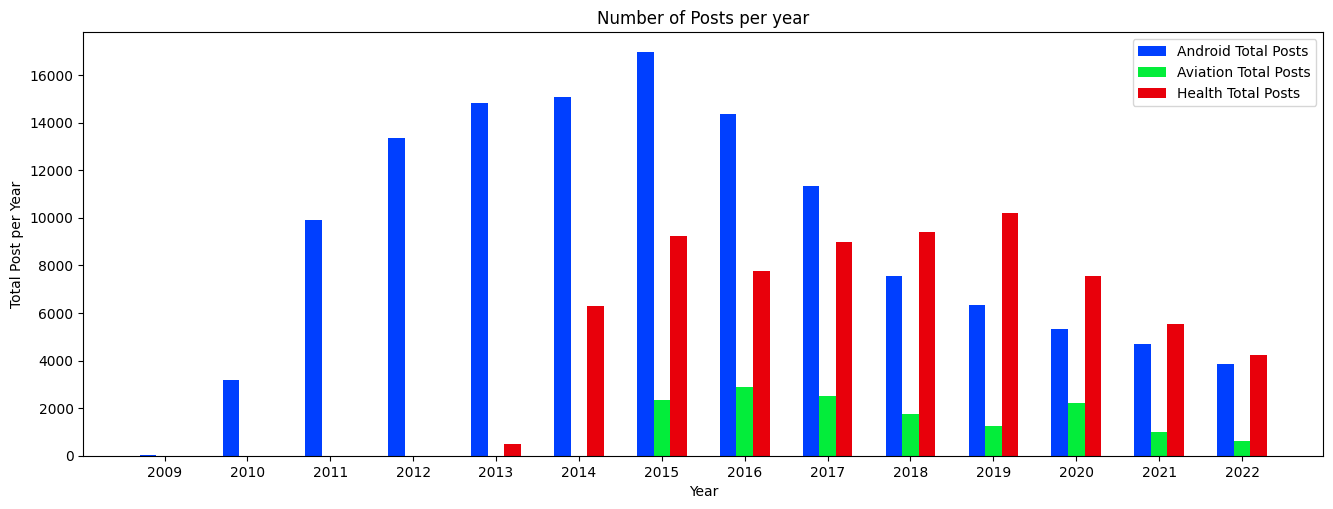

In [250]:
plt.rcParams["figure.figsize"] = (16,5.5)
X = df_PostByYear.Year
Y1 = df_PostByYear['AndroidTotalPosts']
Y2 = df_PostByYear['HealthTotalPosts']
Y3 = df_PostByYear['AviationTotalPosts']

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Y1, 0.2, label = 'Android Total Posts')
plt.bar(X_axis , Y2, 0.2, label = 'Aviation Total Posts')
plt.bar(X_axis + 0.2, Y3, 0.2, label = 'Health Total Posts')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Total Post per Year")
plt.title("Number of Posts per year")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Pie Chart for Posts per year related to Android')

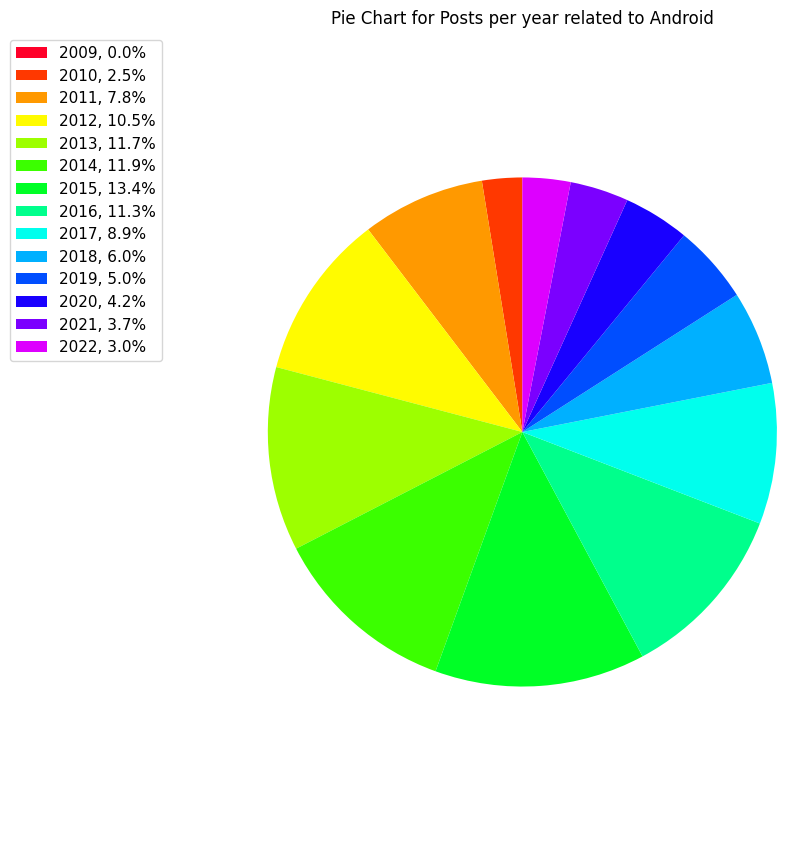

In [251]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('gist_rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_PostByYear.AndroidTotalPosts))
                             for i in range(len(df_PostByYear.AndroidTotalPosts))])
_, _ = ax1.pie(df_PostByYear.AndroidTotalPosts, startangle=90, radius=1500)
ax1.axis('equal')
total = sum(df_PostByYear.AndroidTotalPosts)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(df_PostByYear.Year, df_PostByYear.AndroidTotalPosts)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Pie Chart for Posts per year related to Android')

#### From this analysis it explains that the majority 2015 has the highest number of Posts and 2009 has the lowest number of posts related to Android

Text(0.5, 1.0, 'Pie Chart for Posts per year related to Aviation')

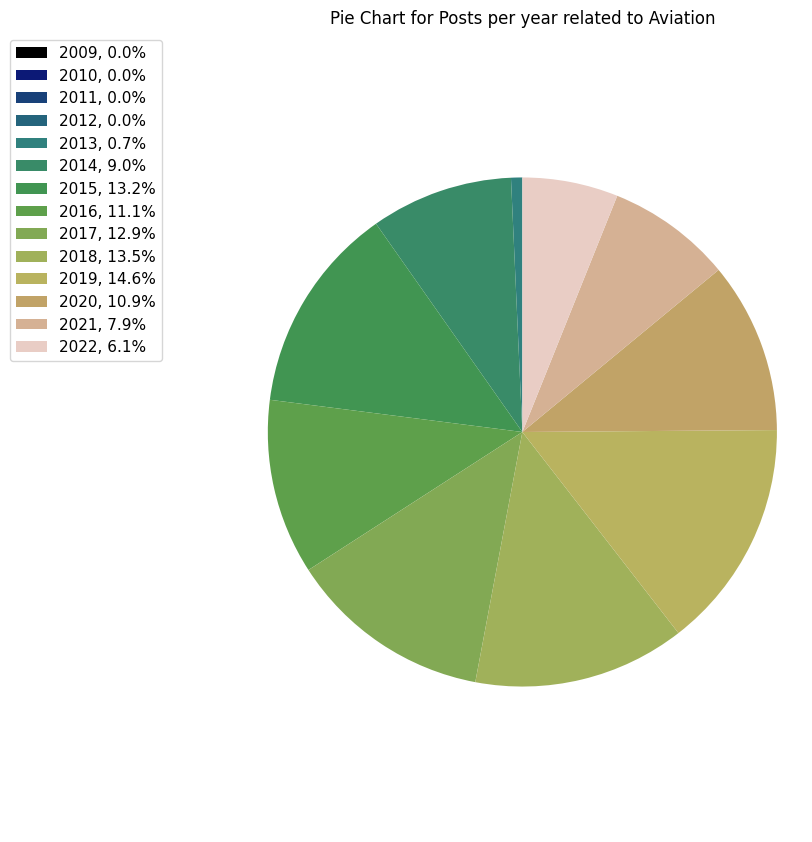

In [252]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('gist_earth')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_PostByYear.AviationTotalPosts))
                             for i in range(len(df_PostByYear.AviationTotalPosts))])
_, _ = ax1.pie(df_PostByYear.AviationTotalPosts, startangle=90, radius=1500)
ax1.axis('equal')
total = sum(df_PostByYear.AviationTotalPosts)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(df_PostByYear.Year, df_PostByYear.AviationTotalPosts)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Pie Chart for Posts per year related to Aviation')

Text(0.5, 1.0, 'Pie Chart for Posts per year related to Health')

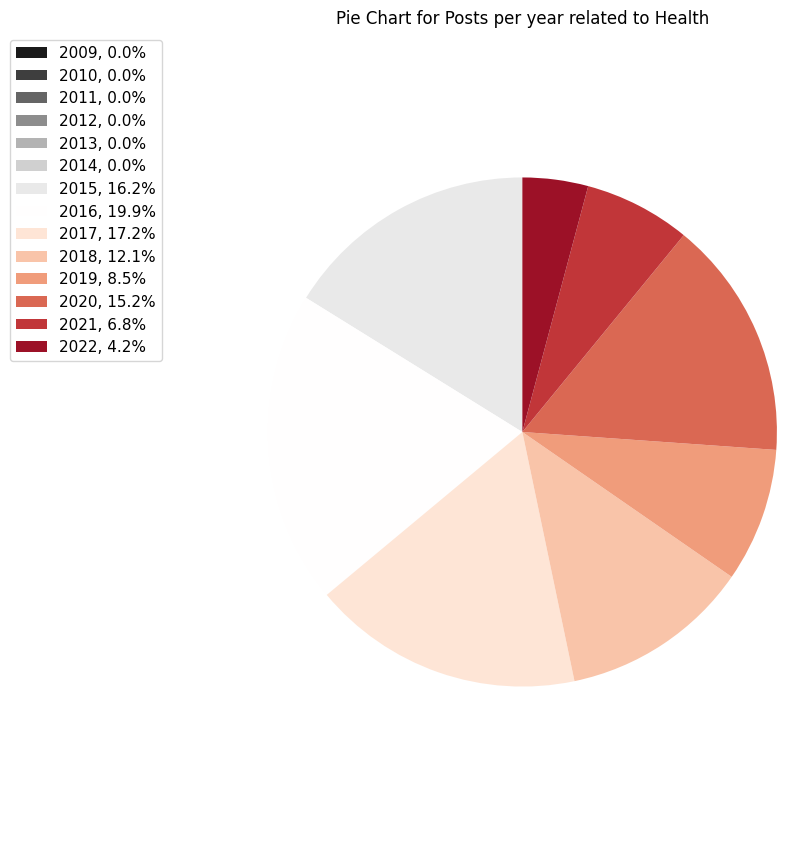

In [253]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
theme = plt.get_cmap('RdGy_r')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_PostByYear.HealthTotalPosts))
                             for i in range(len(df_PostByYear.HealthTotalPosts))])
_, _ = ax1.pie(df_PostByYear.HealthTotalPosts, startangle=90, radius=1500)
ax1.axis('equal')
total = sum(df_PostByYear.HealthTotalPosts)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(df_PostByYear.Year, df_PostByYear.HealthTotalPosts)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Pie Chart for Posts per year related to Health')

#### Lets analyze the numbers of posts over Days

In [254]:
##PostsByDays
Week = {"Day_ID": ["1", "2", "3", "4", "5", "6","7"],
         "WeekDay": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]}
#Android
androidPostsByDays= pd.merge(androidPosts.groupby(androidPosts.CreationDate.apply(lambda i:pd.Timestamp(i).day_name()))['Id'].count().rename_axis('WeekDay').reset_index(name ="TotalPosts"), pd.DataFrame(Week),how='inner' ).sort_values('Day_ID')[['WeekDay','TotalPosts']]
#Aviation
aviationPostsByDays= pd.merge(aviationPosts.groupby(aviationPosts.CreationDate.apply(lambda i:pd.Timestamp(i).day_name()))['Id'].count().rename_axis('WeekDay').reset_index(name ="TotalPosts"), pd.DataFrame(Week),how='inner' ).sort_values('Day_ID')[['WeekDay','TotalPosts']]
#Health
healthPostsByDays= pd.merge(healthPosts.groupby(healthPosts.CreationDate.apply(lambda i:pd.Timestamp(i).day_name()))['Id'].count().rename_axis('WeekDay').reset_index(name ="TotalPosts"), pd.DataFrame(Week),how='inner' ).sort_values('Day_ID')[['WeekDay','TotalPosts']]
#Combine all dataset
df_PostByWeekDay=pd.merge(pd.merge(androidPostsByDays,aviationPostsByDays, on = 'WeekDay',how= 'inner', ).rename(columns={'TotalPosts_x': 'AndroidTotalPosts',
                                                                                           'TotalPosts_y': 'AviationTotalPosts' }), healthPostsByDays , on = 'WeekDay',how= 'inner').fillna(0).rename(columns={'TotalPosts':'HealthTotalPosts'})
df_PostByWeekDay

,WeekDay,AndroidTotalPosts,AviationTotalPosts,HealthTotalPosts
0,Monday,19147,10718,2167
1,Tuesday,19818,11008,2289
2,Wednesday,19646,11122,2253
3,Thursday,19649,10737,2301
4,Friday,18496,10243,2053
5,Saturday,14695,7583,1793
6,Sunday,15381,8259,1745


#### Note: It seems that the Posts created in weekdays are more than weekend

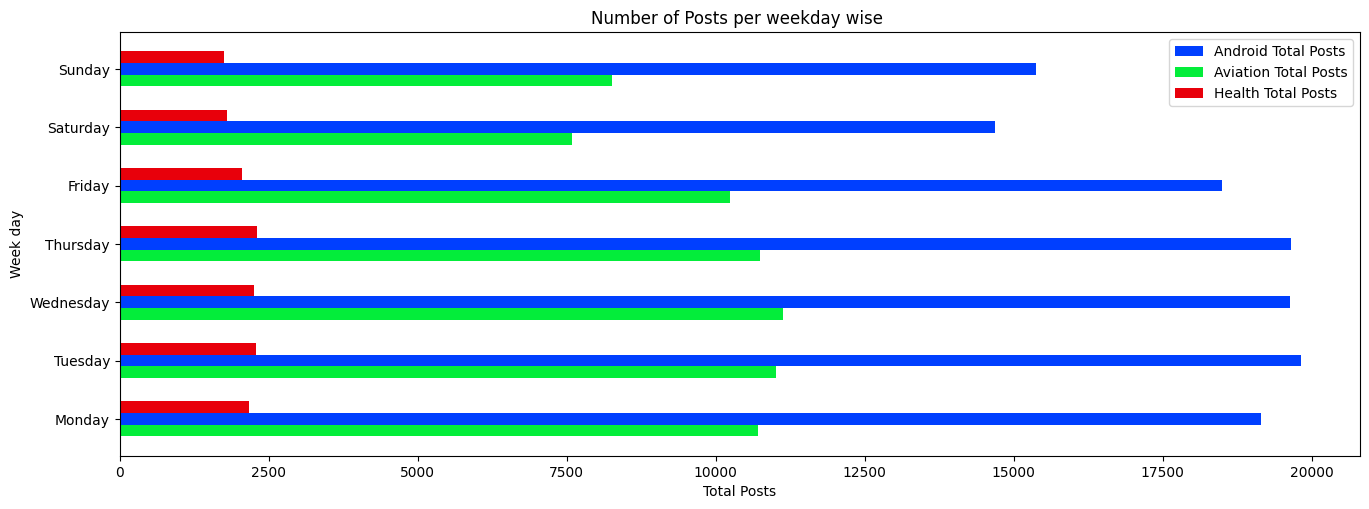

In [257]:
plt.rcParams["figure.figsize"] = (16,5.5)

df_PostByWeekDay.WeekDay, df_PostByWeekDay.AndroidTotalPosts
X = df_PostByWeekDay.WeekDay
Y1 = df_PostByWeekDay.AndroidTotalPosts
Y2 = df_PostByWeekDay.AviationTotalPosts
Y3 = df_PostByWeekDay.HealthTotalPosts

Y_axis = np.arange(len(X))
plt.barh(Y_axis, Y1, 0.2, label = 'Android Total Posts')
plt.barh(Y_axis - 0.2 , Y2, 0.2, label = 'Aviation Total Posts')
plt.barh(Y_axis + 0.2 , Y3, 0.2, label = 'Health Total Posts')
plt.yticks(Y_axis,X)
plt.xlabel("Total Posts")
plt.ylabel("Week day")
plt.title("Number of Posts per weekday wise ")
plt.legend()
plt.show()

### Analysis on Users data

In [258]:
androidUsers = df_dict_android['android_Users']
aviationUsers = df_dict_aviation['aviation_Users']
healthUsers = df_dict_health['health_Users']

In [259]:
# UsersByYear
from importlib import reload
plt=reload(plt)

#Android
androidUsersByYear= androidUsers.groupby(pd.to_datetime(androidUsers.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalUsers")
#Aviation
aviationUsersByYear= aviationUsers.groupby(pd.to_datetime(aviationUsers.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalUsers")
#Health
healthUsersByYear= healthUsers.groupby(pd.to_datetime(healthUsers.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'CreationDate'].count().rename_axis("Year").reset_index(name="TotalUsers")


df_UsersByYear=pd.merge(pd.merge(androidUsersByYear,healthUsersByYear, on = 'Year',how= 'outer', ).rename(columns={'TotalUsers_x': 'AndroidTotalUsers','TotalUsers_y': 'HealthTotalUsers' }), aviationUsersByYear , on = 'Year',how= 'outer').fillna(0).rename(columns={'TotalUsers':'AviationTotalUsers'})


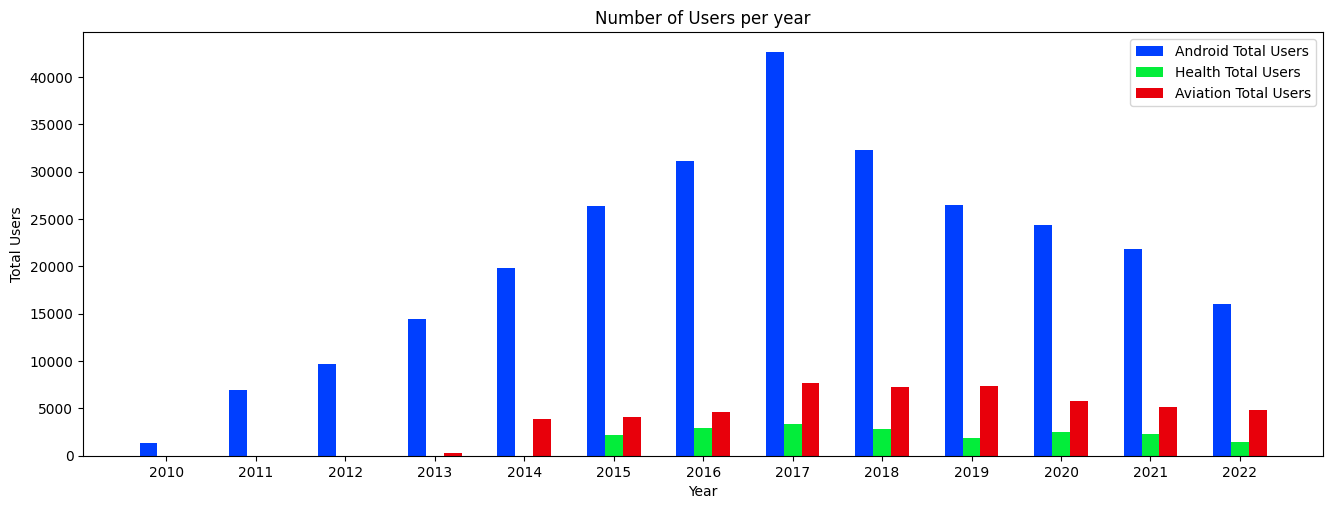

In [260]:
df_UsersByYear

plt.rcParams["figure.figsize"] = (16,5.5)
X = df_UsersByYear.Year
Y1 = df_UsersByYear['AndroidTotalUsers']
Y2 = df_UsersByYear['HealthTotalUsers']
Y3 = df_UsersByYear['AviationTotalUsers']

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Y1, 0.2, label = 'Android Total Users')
plt.bar(X_axis , Y2, 0.2, label = 'Health Total Users')
plt.bar(X_axis + 0.2, Y3, 0.2, label = 'Aviation Total Users')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.title("Number of Users per year")
plt.legend()
plt.show()

### Some more analysis on Posts and Users Dataset

In [261]:
# Load Posts and Users

androidPosts_df = androidPosts[['Id','OwnerUserId']]
androidUsers_df= androidUsers['Id']

healthPosts_df = healthPosts[['Id','OwnerUserId']]
healthUsers_df= healthUsers['Id']

aviationPosts_df = aviationPosts[['Id','OwnerUserId']]
aviationUsers_df= aviationUsers['Id']

## Identify the number of Users who has 'posted' vs 'not posted'
#Android
android_df1= pd.merge(androidUsers_df,androidPosts_df, how= 'left', left_on= 'Id', right_on='OwnerUserId')[['Id_x','OwnerUserId']].drop_duplicates()
android_df1['Postflag']=np.where(android_df1.OwnerUserId.isnull(),'NotPosted', 'Posted' )
android_df_result=android_df1.groupby('Postflag').count()['Id_x'].reset_index(name='No_of_Users')

# Health
health_df1= pd.merge(healthUsers_df,healthPosts_df, how= 'left', left_on= 'Id', right_on='OwnerUserId')[['Id_x','OwnerUserId']].drop_duplicates()
health_df1['Postflag']=np.where(health_df1.OwnerUserId.isnull(),'NotPosted', 'Posted' )
health_df_result=health_df1.groupby('Postflag').count()['Id_x'].reset_index(name='No_of_Users')

# Aviation
aviation_df1= pd.merge(aviationUsers_df,aviationPosts_df, how= 'left', left_on= 'Id', right_on='OwnerUserId')[['Id_x','OwnerUserId']].drop_duplicates()
aviation_df1['Postflag']=np.where(aviation_df1.OwnerUserId.isnull(),'NotPosted', 'Posted' )
aviation_df_result=aviation_df1.groupby('Postflag').count()['Id_x'].reset_index(name='No_of_Users')



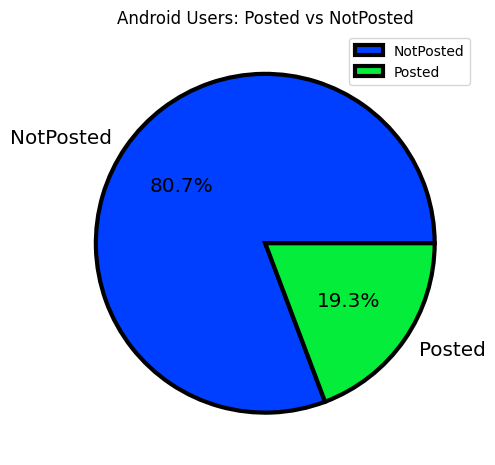

In [262]:
plt.pie(android_df_result.No_of_Users, labels = android_df_result.Postflag, autopct='%.1f%%'
        ,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
    textprops={'size': 'x-large', })
plt.legend()
plt.title('Android Users: Posted vs NotPosted')
plt.show()


#### Note: From the above analysis only 19% users has posed in this forum.

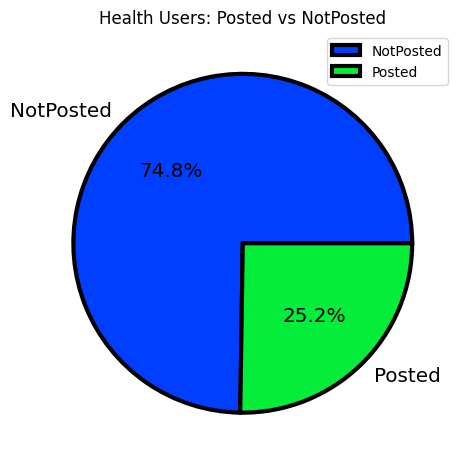

In [263]:
plt.pie(health_df_result.No_of_Users, labels = health_df_result.Postflag, autopct='%.1f%%'
        ,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
    textprops={'size': 'x-large', })
plt.legend()
plt.title('Health Users: Posted vs NotPosted')
plt.show()

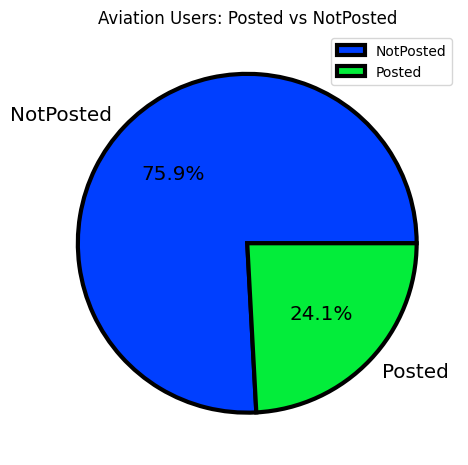

In [264]:
plt.pie(aviation_df_result.No_of_Users, labels = aviation_df_result.Postflag, autopct='%.1f%%'
        ,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
    textprops={'size': 'x-large', })
plt.legend()
plt.title('Aviation Users: Posted vs NotPosted')
plt.show()

#### Find the Response time of a new post

In [265]:
androidComments = df_dict_android['android_Comments']
aviationComments = df_dict_aviation['aviation_Comments']
healthComments = df_dict_health['health_Comments']

In [266]:
## Android
androidFirstComment_df = (androidComments.groupby(['PostId'])['CreationDate'].agg('min')).rename_axis('PostId').reset_index(name='FirstComment').sort_values('PostId')
androidPostComment_df= pd.merge(androidPosts, androidFirstComment_df, how= 'left', left_on= 'Id', right_on= 'PostId')[['Id','CreationDate', 'FirstComment']].dropna()
androidPostComment_df['ResponseTime(s)'] = androidPostComment_df['FirstComment'].apply(lambda i:pd.Timestamp(i)) - androidPostComment_df['CreationDate'].apply(lambda i:pd.Timestamp(i))
androidPostComment_df['ResponseTime(s)'] = androidPostComment_df['ResponseTime(s)'] .astype('timedelta64[s]')
androidAvgResponseByYear =androidPostComment_df.groupby(pd.to_datetime(androidPostComment_df.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'ResponseTime(s)'].mean().rename_axis("Year").reset_index(name="AvgResponse(s)")
androidAvgResponseByYear['AvgResponse(h)'] = androidAvgResponseByYear['AvgResponse(s)']/3600


## Aviation
aviationFirstComment_df = (aviationComments.groupby(['PostId'])['CreationDate'].agg('min')).rename_axis('PostId').reset_index(name='FirstComment').sort_values('PostId')
aviationPostComment_df= pd.merge(aviationPosts, aviationFirstComment_df, how= 'left', left_on= 'Id', right_on= 'PostId')[['Id','CreationDate', 'FirstComment']].dropna()
aviationPostComment_df['ResponseTime(s)'] = aviationPostComment_df['FirstComment'].apply(lambda i:pd.Timestamp(i)) - aviationPostComment_df['CreationDate'].apply(lambda i:pd.Timestamp(i))
aviationPostComment_df['ResponseTime(s)'] = aviationPostComment_df['ResponseTime(s)'] .astype('timedelta64[s]')
aviationAvgResponseByYear =aviationPostComment_df.groupby(pd.to_datetime(aviationPostComment_df.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'ResponseTime(s)'].mean().rename_axis("Year").reset_index(name="AvgResponse(s)")
aviationAvgResponseByYear['AvgResponse(h)'] = aviationAvgResponseByYear['AvgResponse(s)']/3600

##Health
healthFirstComment_df = (healthComments.groupby(['PostId'])['CreationDate'].agg('min')).rename_axis('PostId').reset_index(name='FirstComment').sort_values('PostId')
healthPostComment_df= pd.merge(healthPosts, healthFirstComment_df, how= 'left', left_on= 'Id', right_on= 'PostId')[['Id','CreationDate', 'FirstComment']].dropna()
healthPostComment_df['ResponseTime(s)'] = healthPostComment_df['FirstComment'].apply(lambda i:pd.Timestamp(i)) - healthPostComment_df['CreationDate'].apply(lambda i:pd.Timestamp(i))
healthPostComment_df['ResponseTime(s)'] = healthPostComment_df['ResponseTime(s)'] .astype('timedelta64[s]')
healthAvgResponseByYear =healthPostComment_df.groupby(pd.to_datetime(healthPostComment_df.CreationDate, format="%Y-%m-%dT%H:%M:%S").dt.year)[
        'ResponseTime(s)'].mean().rename_axis("Year").reset_index(name="AvgResponse(s)")
healthAvgResponseByYear['AvgResponse(h)'] = healthAvgResponseByYear['AvgResponse(s)']/3600
androidAvgResponseByYear


,Year,AvgResponse(s),AvgResponse(h)
0,2009,2.591609e+07,7198.913225
1,2010,1.304737e+07,3624.269181
2,2011,9.967415e+06,2768.726353
3,2012,7.939510e+06,2205.419523
4,2013,8.206907e+06,2279.696376
5,2014,8.089047e+06,2246.957467
6,2015,6.689975e+06,1858.326317
7,2016,5.709241e+06,1585.900416
8,2017,6.170706e+06,1714.085125
9,2018,5.754841e+06,1598.566814


In [267]:
AvgResponseByYear=pd.merge(pd.merge(androidAvgResponseByYear,healthAvgResponseByYear, on = 'Year',how= 'outer', )
                           .rename(columns={'AvgResponse(h)_x': 'AndroidAvgResponse(h)','AvgResponse(s)_x': 'AndroidAvgResponse(s)',
                                             'AvgResponse(h)_y': 'HealthAvgResponse(h)','AvgResponse(s)_y': 'HealthAvgResponse(s)'}),
                           aviationAvgResponseByYear , on = 'Year',how= 'outer').fillna(0).rename(columns={'AvgResponse(h)':'AviationAvgResponse(h)',
                                                                                                           'AvgResponse(s)':'AviationAvgResponse(s)'})
AvgResponseByYear


,Year,AndroidAvgResponse(s),AndroidAvgResponse(h),HealthAvgResponse(s),HealthAvgResponse(h),AviationAvgResponse(s),AviationAvgResponse(h)
0,2009,2.591609e+07,7198.913225,0.000000e+00,0.000000,0.000000e+00,0.000000
1,2010,1.304737e+07,3624.269181,0.000000e+00,0.000000,0.000000e+00,0.000000
2,2011,9.967415e+06,2768.726353,0.000000e+00,0.000000,0.000000e+00,0.000000
3,2012,7.939510e+06,2205.419523,0.000000e+00,0.000000,0.000000e+00,0.000000
4,2013,8.206907e+06,2279.696376,0.000000e+00,0.000000,1.957424e+07,5437.287867
5,2014,8.089047e+06,2246.957467,0.000000e+00,0.000000,1.050898e+07,2919.160244
6,2015,6.689975e+06,1858.326317,8.878428e+06,2466.230000,7.547450e+06,2096.513918
7,2016,5.709241e+06,1585.900416,6.700137e+06,1861.149223,4.168050e+06,1157.791702
8,2017,6.170706e+06,1714.085125,3.335238e+06,926.454998,3.729855e+06,1036.070827
9,2018,5.754841e+06,1598.566814,1.709820e+06,474.950036,2.590254e+06,719.515034


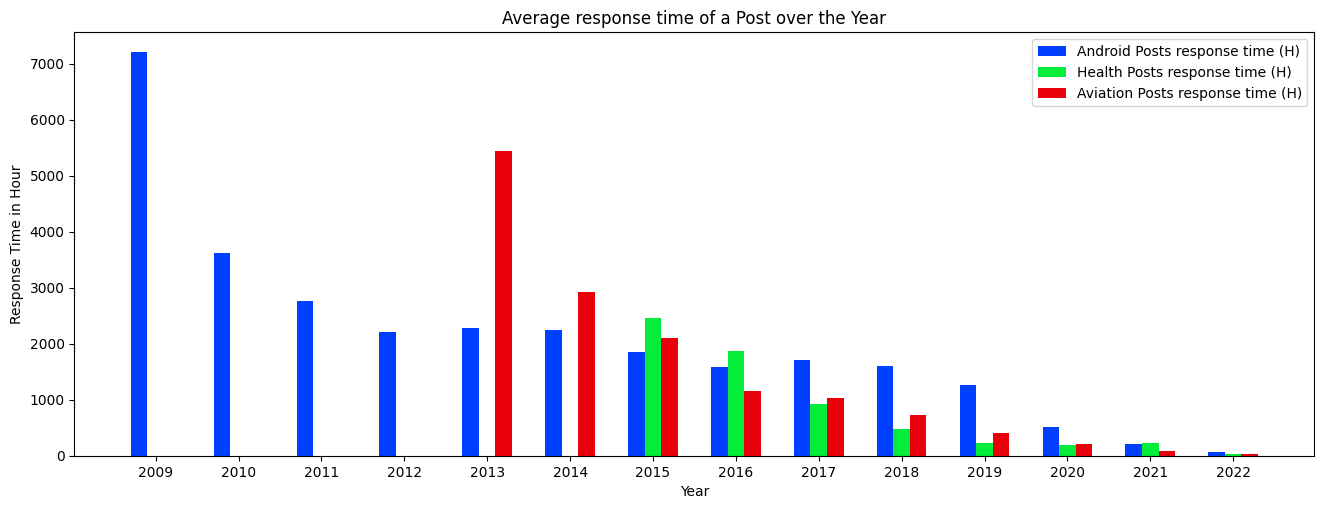

In [268]:

plt.rcParams["figure.figsize"] = (16,5.5)
X = AvgResponseByYear.Year
Y1 = AvgResponseByYear['AndroidAvgResponse(h)']
Y2 = AvgResponseByYear['HealthAvgResponse(h)']
Y3 = AvgResponseByYear['AviationAvgResponse(h)']

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Y1, 0.2, label = 'Android Posts response time (H)' )
plt.bar(X_axis      , Y2, 0.2, label = 'Health Posts response time (H)'  )
plt.bar(X_axis + 0.2, Y3, 0.2, label = 'Aviation Posts response time (H)')

plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Response Time in Hour")
plt.title("Average response time of a Post over the Year")
plt.legend()
plt.show()



#### Note: The trend of getting a comments on post is decreasing over the year